This dataset aims to shed light on salaries in the field of Data Science for the years 2020 to 2022. With a focus on various aspects of employment, including work experience, job titles, and company locations, this dataset provides valuable insights into salary distributions within the industry.

This notebook aims to:

1-Data preprocessing 

2-Practice using libraries to visualize data

3-Visualize data, provide explanations about the correlation between attributes

In [2]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
#Load Dataset
salary = pd.read_csv('/Users/tamerali/Desktop/1.DataEngineering/DataScienceSalary/ds_salaries.csv')

In [4]:
#Load dataset information
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
#Dataset Statistics
salary.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
#Check Dataset columns 
salary.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
#Check Missing Values
salary.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
#Replace values in dataset to be easier to use 

#Replace values in experience-level column
salary['experience_level'] = salary['experience_level'].replace('EN', 'Entry-Level')
salary['experience_level'] = salary['experience_level'].replace('EX', 'Experienced')
salary['experience_level'] = salary['experience_level'].replace('MI', 'Mid-Level')
salary['experience_level'] = salary['experience_level'].replace('SE', 'Senior')

#Replace values in employment_type column
salary['employment_type'] = salary['employment_type'].replace('FT', 'Full-Time')
salary['employment_type'] = salary['employment_type'].replace('CT', 'Contractor')
salary['employment_type'] = salary['employment_type'].replace('FL', 'Freelancer')
salary['employment_type'] = salary['employment_type'].replace('PT', 'Part-Time')

#Replace values in Company size column
salary['company_size'] = salary['company_size'].replace('L', "Large")
salary['company_size'] = salary['company_size'].replace('M', "Medium")
salary['company_size'] = salary['company_size'].replace('S', "Small")

In [10]:
#show the dataset top row result
salary.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


Text(0.5, 1.0, 'Salary Over The Time')

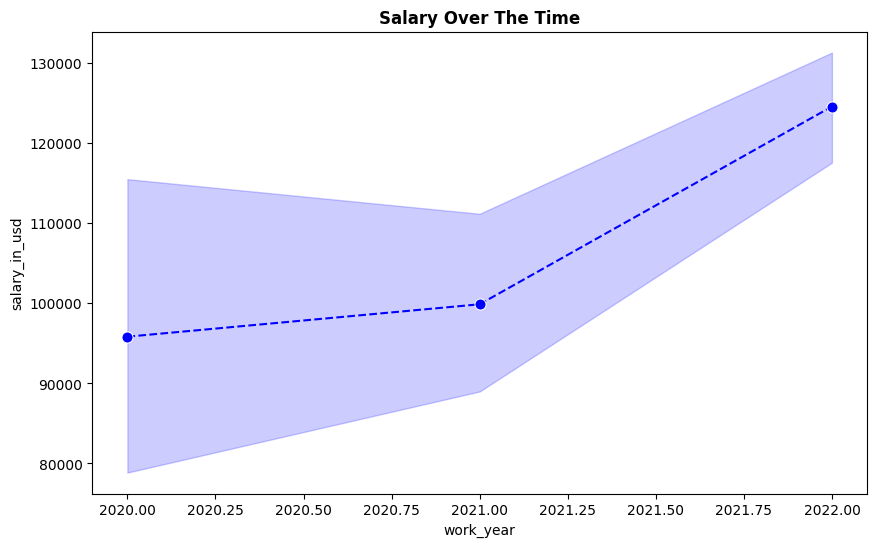

In [15]:
#Data Science Salary over the time Figure
 
plt.figure(figsize = (10,6))
fig = salary[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
Draw = sns.lineplot(data = fig ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Over The Time', fontsize=12, fontweight='bold')




1-There wasn't much change in salary from 2020 to 2021.

2-Changes occurred in salary from 2021 to 2022.


Text(0.5, 1.0, 'Salary Trend Over Time by Company Size')

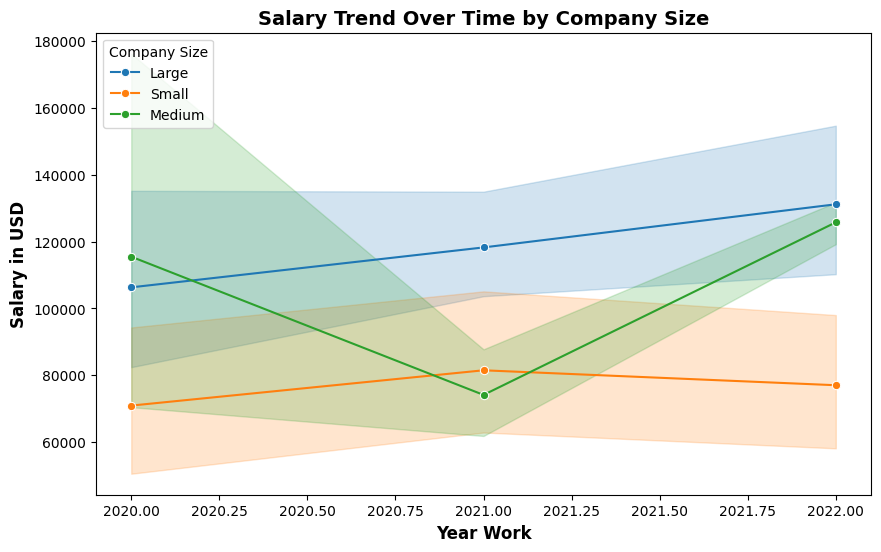

In [16]:
#Salary Trend Over Time by Company Size 
plt.figure(figsize=(10, 6))
fig1= sns.lineplot(data=salary, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')

1- The salary in medium-sized companies is increasing compared to small and large companies.

2-The salary line in large companies is not fluctuating as much as in medium-sized companies.

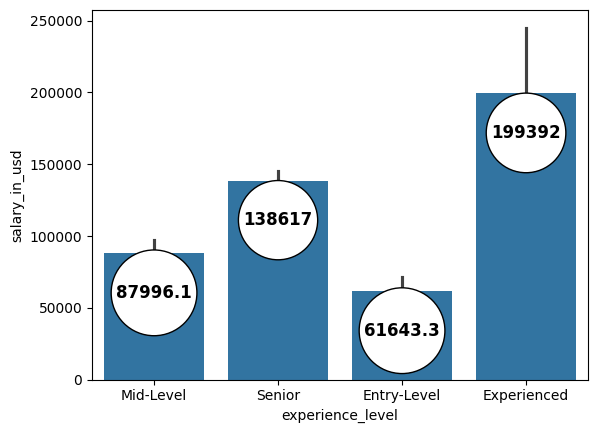

In [17]:
#Average Salary by Experience Level
fig2= sns.barplot(y= salary['salary_in_usd'], x=salary['experience_level'])
for container in fig2.containers:
    fig2.bar_label(container,
                padding = -35,
                fontsize = 12,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'black', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

1-Experienced professionals earn the highest average salary at approximately 199392 USD.

2- Seniors also receive a competitive average salary of about 138,617 USD.

3-Mid-Level employees have an average salary of around 87,996.1 USD.

4-Entry-Level positions offer a lower average salary, at approximately 61,643.3 USD.

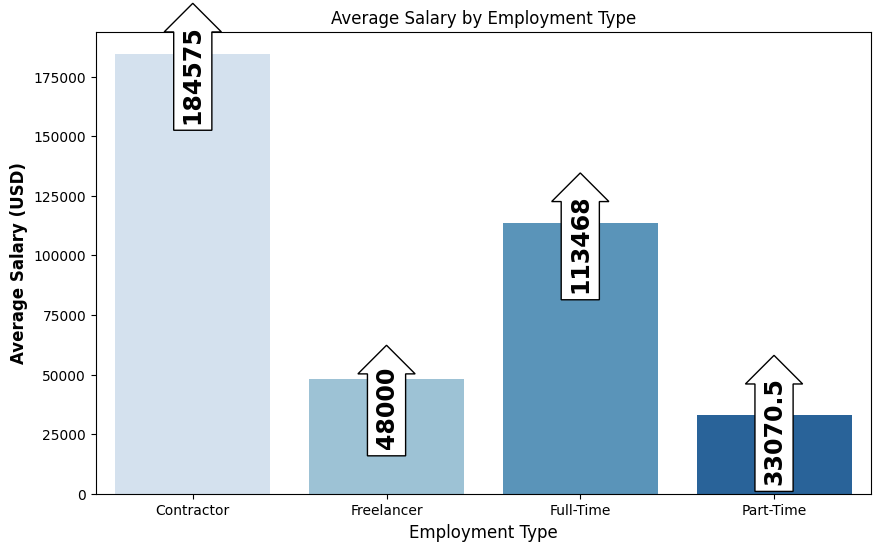

In [18]:
#Average Salary by Employment Type

#Group data by 'employment_type' and calculate the average salary for each type
emp_salary = salary.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
fig3 = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'Blues')
plt.title('Average Salary by Employment Type', fontsize=12)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in fig3.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'black', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90
                      
                 )

1-Full-Time employees have the highest average salary at approximately 113,468 USD.

2-Contractors also earn a competitive average salary of about 184,575 USD.

3-Freelancers and Part-Time workers have lower average salaries, at around 48,000 USD and 33,070.5 USD.

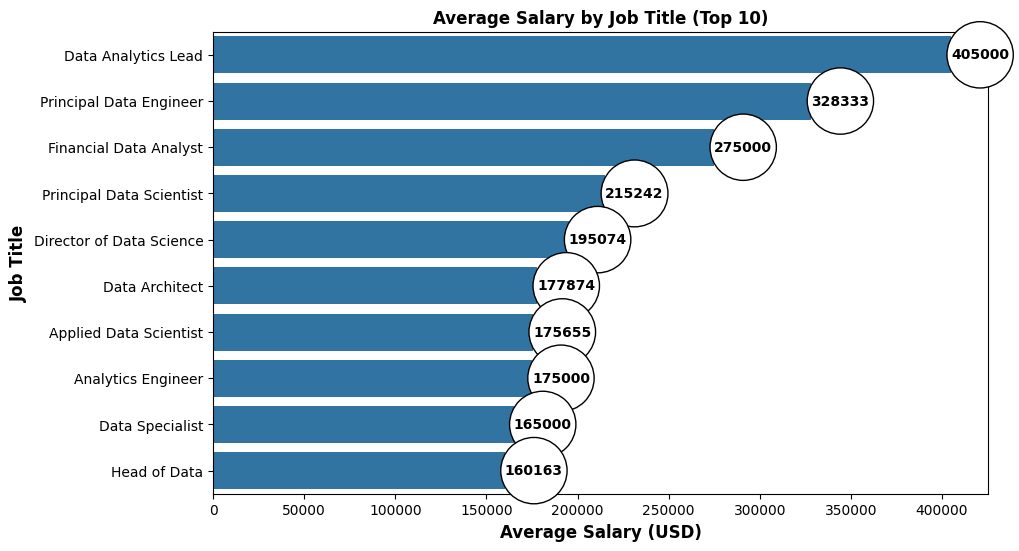

In [19]:
#Average Salary by Job Title (Top 10)

#Group data by 'job_title' and calculate the average salary for each title
job_salary= salary.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
fig4= sns.barplot(x= job_salary.values[:10], y = job_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in fig4.containers:
    fig4.bar_label(container,
                
                bbox = {'boxstyle': 'circle', 'facecolor': 'white', 'edgecolor': 'black'},
                fontweight = 'bold'
                
               
               )

1- Data Analytics Lead has the highest average salary at 405,000 USD.

2- Principal Data Engineer and Financial Data Analyst also have notably high salaries.

3-The top 10 job titles exhibit strong earning potential in the data science field.

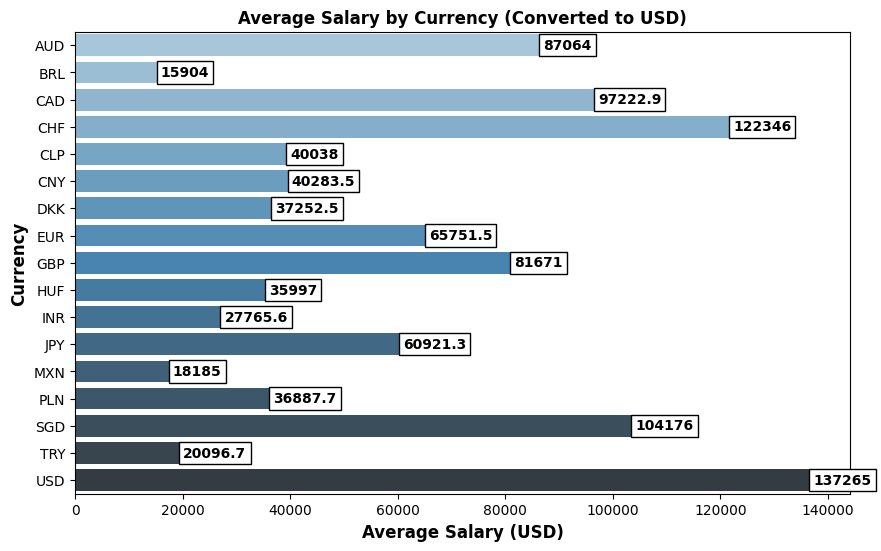

In [21]:
#Average Salary by Currency

# Group data by 'salary_currency' and calculate the average salary in USD for each currency
currency_salary  = salary.groupby('salary_currency')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
fig5= sns.barplot(x = currency_salary.values , y  = currency_salary.index, palette = 'Blues_d')
plt.title('Average Salary by Currency (Converted to USD)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Currency', fontsize=12, fontweight='bold')


for container in fig5.containers:
    fig5.bar_label(container,
                bbox = {'boxstyle': 'square', 'facecolor': 'white', 'edgecolor': 'black'},
                fontweight = 'bold'
               
                
               )

1-Employees receiving salaries in USD have the highest average salary at approximately 137,265 USD.

2-SGD (Singapore dollar) and CHF (Swiss Franc) also offer competitive average salaries.

3-Other currencies vary in average salaries, with MXN (Mexican Peso) and BRL (Brazilian Real) being among the lowest.

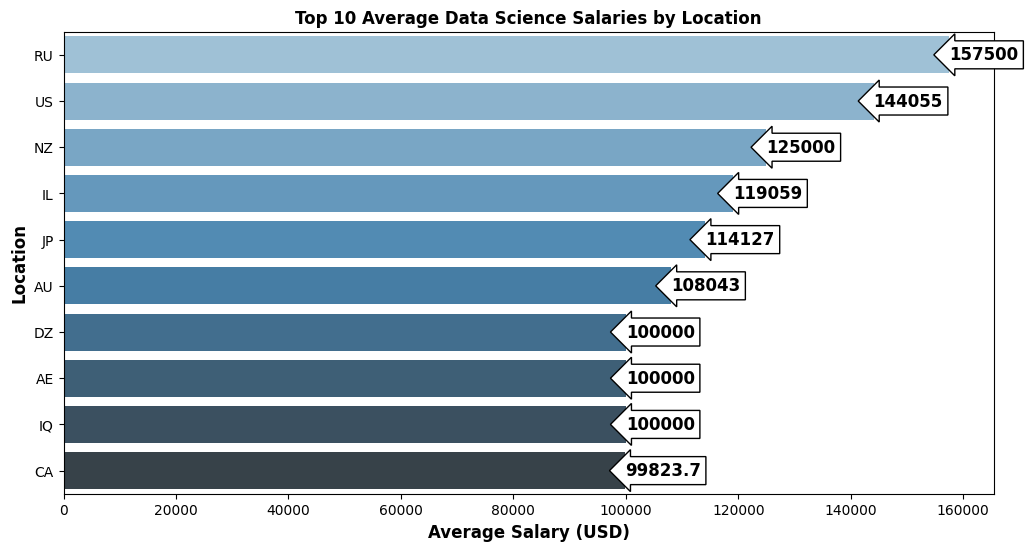

In [22]:
#Average Data Science Salaries by Location

# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = salary.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
fig6= sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'Blues_d')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in fig6.containers:
    fig6.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'black', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )


1-In Russia (RU), the average data science salary is notably high, at approximately 157,500 USD.

2-The United States (US) also offer competitive average salaries, with approximately 144,055 USD.

3-Canada (CA) is the lowest salary with 99,823.7 USD.

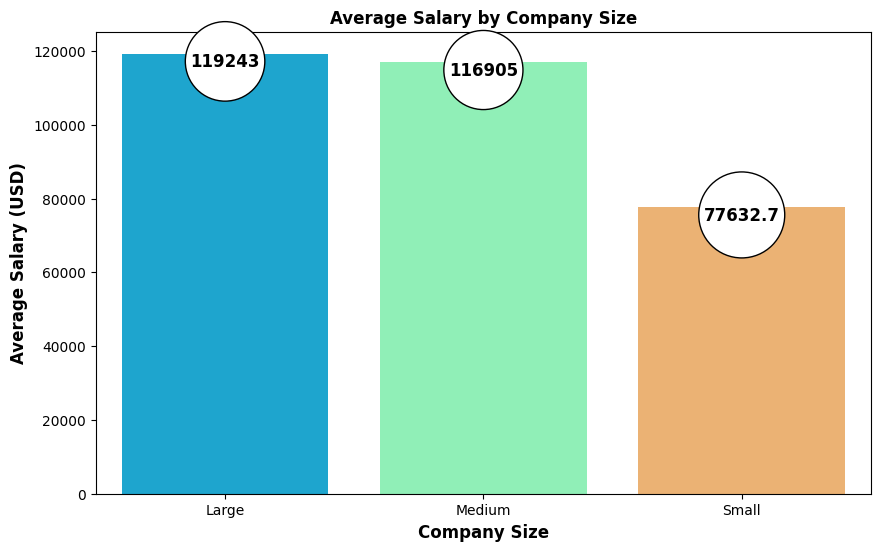

In [23]:
#Average Salary by Company Size 

# Group data by 'company_size' and calculate the average salary for each size
company_size_salary = salary.groupby('company_size')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
fig7= sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'rainbow')
plt.title('Average Salary by Company Size', fontsize=12, fontweight='bold')
plt.xlabel('Company Size',fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')


for container in fig7.containers:
    fig7.bar_label(container, fontweight = 'bold',
                padding = -12,
                fontsize=12,
                bbox = {'boxstyle': 'circle', 'facecolor': 'white', 'edgecolor': 'black'}
                
               )


1-Large companies offer the highest average salary at approximately 119,243 USD.

2-Medium-sized companies is high also with an average salary about 116,905 USD.

3-Small companies offer a lower average salary of around 77,632.7 USD.

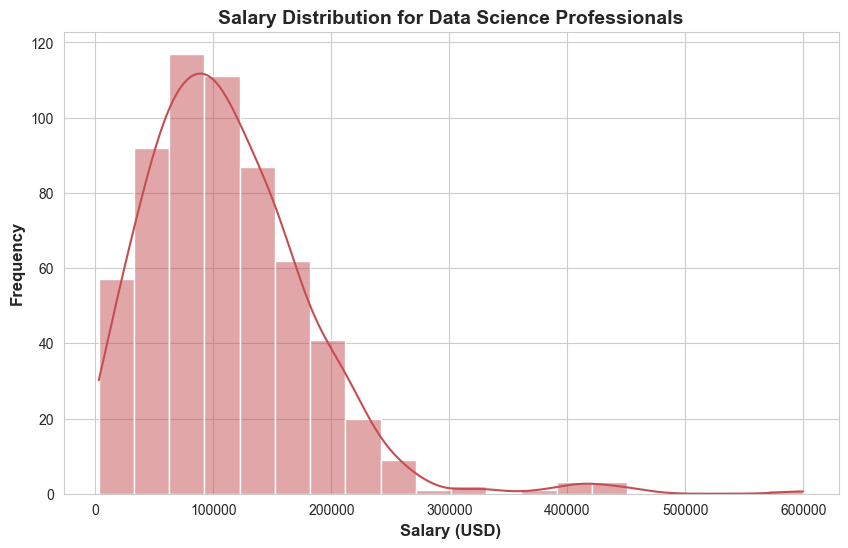

In [24]:
#Salary Distribution for Data Science Professionals

# Set a custom style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(salary['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

1-The salary distribution for data science professionals is right-skewed, with a majority of professionals earning lower to mid-range salaries.

2-A noticeable peak in the distribution suggests a concentration of professionals within a specific salary range.

3-The KDE (Kernel Density Estimate) curve provides a smooth estimate of the distribution, showing a prominent peak.

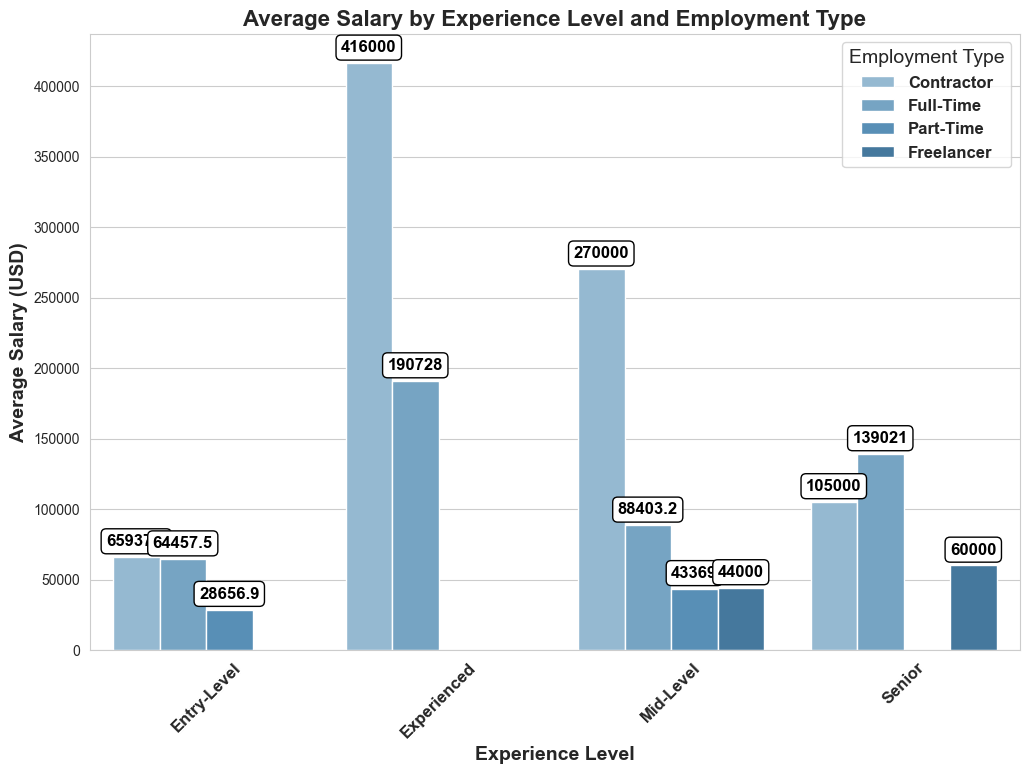

In [25]:
#Average Salary by Experience Level and Employment Type 

# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = salary.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]


plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('Blues_d'))

fig8= sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in fig8.containers:
    fig8.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

Best Employment Type and Experience Level for Maximum Cost-Effectiveness:

Experience Level: Experienced

Employment Type: Contractor

Average Salary (USD): 416,000.0

Highest average salary in USD: 230000.0


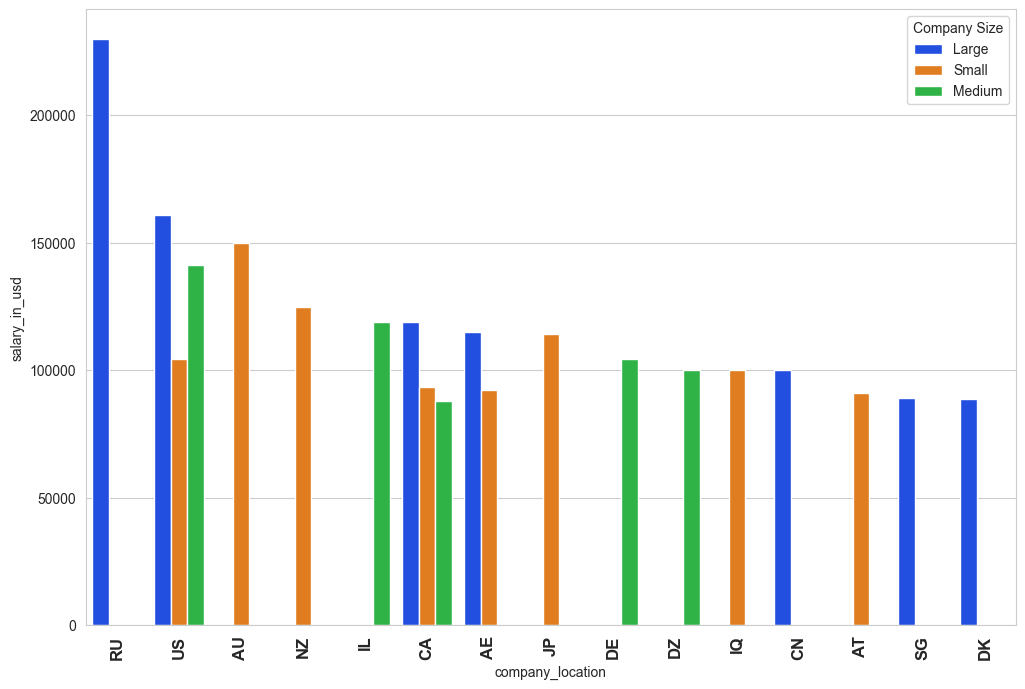

In [27]:
#Average Salary by Company Location and Company Size

 
cost_effectiveness = salary.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().reset_index().sort_values(by = 'salary_in_usd', ascending = False)[:20]

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

sns.set_palette(sns.color_palette('bright'))

fig8= sns.barplot(x='company_location', y='salary_in_usd', hue='company_size', data=cost_effectiveness)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')


lg = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')

highest_salary_usd = cost_effectiveness['salary_in_usd'].max()
print("Highest average salary in USD:", highest_salary_usd)

In Russia (RU), large companies tend to offer an average salary of 230,000 USD, meeting cost-effectiveness criteria